In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd

In [24]:

online_df = pd.read_csv('/content/Online.csv', encoding='latin-1')
# Try 'latin-1' encoding first. If this doesn't work, try other encodings like 'cp1252', 'ISO-8859-1', etc.
online_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Create new column Totalsum
online_df['Totalsum'] = online_df['Quantity'] * online_df['UnitPrice']
#change data type to date
online_df['InvoiceDate'] = online_df['InvoiceDate'].astype('datetime64[ns]')
# create a latest date snapshot
snapshot_date = online_df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [27]:
#Extract recency, frequency and monetaryvalue
rfm_df = online_df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'CustomerID': 'count',
    'Totalsum': 'sum'
})
# rename columns
online_rmf_df = rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'CustomerID': 'Frequency',
    'Totalsum': 'MonetaryValue'
})
online_rmf_df.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,327,2,0.00
12347.0,41,182,4310.00
12348.0,77,31,1797.24
12349.0,20,73,1757.55
12350.0,312,17,334.40


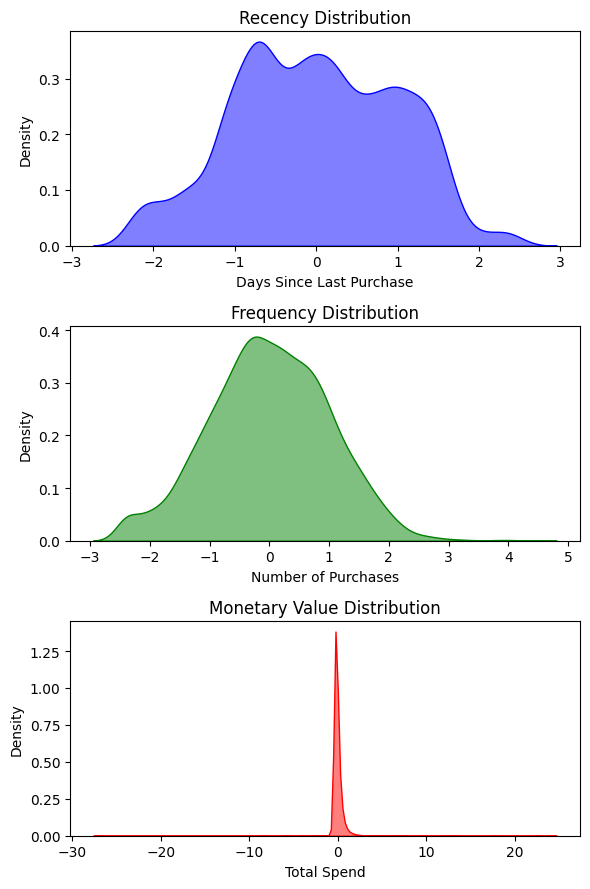

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rfm_kde_separate(rfm_df):
    """
    Visualizes the distribution of Recency, Frequency, and Monetary Value using KDE plots,
    arranged separately in a single figure.

    Parameters:
    rfm_df (DataFrame): A Pandas DataFrame containing 'Recency', 'Frequency', and 'MonetaryValue' columns.
    """
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 9))  # 3 rows, 1 column

    # Recency Distribution (Top)
    sns.kdeplot(rfm_df['Recency'], color='blue', fill=True, alpha=0.5, ax=axes[0])
    axes[0].set_title('Recency Distribution', fontsize=12)
    axes[0].set_xlabel('Days Since Last Purchase', fontsize=10)
    axes[0].set_ylabel('Density', fontsize=10)

    # Frequency Distribution (Middle)
    sns.kdeplot(rfm_df['Frequency'], color='green', fill=True, alpha=0.5, ax=axes[1])
    axes[1].set_title('Frequency Distribution', fontsize=12)
    axes[1].set_xlabel('Number of Purchases', fontsize=10)
    axes[1].set_ylabel('Density', fontsize=10)

    # Monetary Value Distribution (Bottom)
    sns.kdeplot(rfm_df['MonetaryValue'], color='red', fill=True, alpha=0.5, ax=axes[2])
    axes[2].set_title('Monetary Value Distribution', fontsize=12)
    axes[2].set_xlabel('Total Spend', fontsize=10)
    axes[2].set_ylabel('Density', fontsize=10)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
plot_rfm_kde_separate(online_rmf_df)

In [34]:
online_rmf_df.describe()

,Recency,Frequency,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,101.947850,93.053294,1898.459701
std,113.928875,232.471608,8219.345141
min,1.000000,1.000000,-4287.630000
25%,21.000000,17.000000,293.362500
50%,58.000000,42.000000,648.075000
75%,153.000000,102.000000,1611.725000
max,698.000000,7983.000000,279489.020000


In [35]:
# use power transformation to unskew data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
online_rmf_df[['Recency', 'Frequency', 'MonetaryValue']] = pt.fit_transform(online_rmf_df[['Recency', 'Frequency', 'MonetaryValue']])


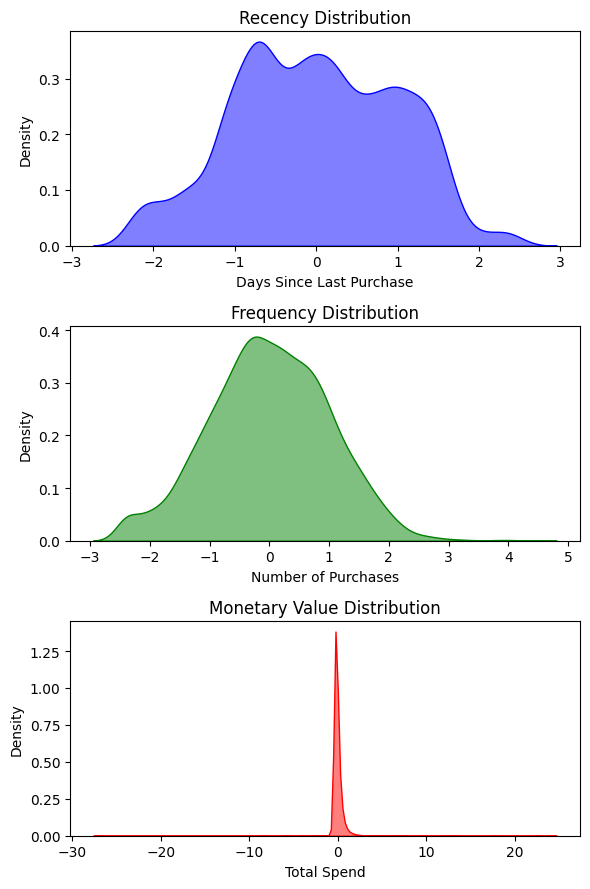

In [41]:

# scale data data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
online_rmf_scaled = scaler.fit_transform(online_rmf_df)
# create a data frame
online_rmf_scaled_df = pd.DataFrame(online_rmf_scaled, columns=online_rmf_df.columns, index=online_rmf_df.index)
# visualize distributions
plot_rfm_kde_separate(online_rmf_scaled_df)

In [42]:
print(online_rmf_scaled_df)

             Recency  Frequency  MonetaryValue
CustomerID                                    
12346.0     1.565121  -2.074164      -0.399050
12347.0    -0.281439   1.164080       0.572500
12348.0     0.217985  -0.224987       0.093868
12349.0    -0.789905   0.439950       0.085397
12350.0     1.516646  -0.678292      -0.265842
...              ...        ...            ...
18280.0     0.868417  -1.064329      -0.316781
18281.0    -1.588626  -1.312994      -0.355365
18282.0     0.386710  -0.875515      -0.318213
18283.0    -1.164689   2.312283       0.156126
18287.0    -2.179005   0.407000       0.102371

[4372 rows x 3 columns]


In [43]:
online_rmf_scaled_df.to_csv('online_rmf_scaled_df.csv', index=True)

In [44]:
online_rmf_df.to_csv('online_rmf_df.csv', index=True)